<a href="https://colab.research.google.com/github/Testeh69/ML_learning/blob/main/linear_ml_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [2]:
import chardet

# Chemin du fichier CSV
file_path = 'SeoulBikeData.csv'

# Lecture des premiers octets du fichier pour la détection de l'encodage
with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())

# L'encodage détecté
detected_encoding = result['encoding']

print(f"L'encodage du fichier CSV est : {detected_encoding}")


L'encodage du fichier CSV est : ISO-8859-1


In [3]:
columns = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv",  encoding='ISO-8859-1').drop(["Date", "Holiday", "Seasons"],axis = 1)
df.columns = columns

In [4]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"]==12]
df = df.drop(["hour"], axis = 1)

In [6]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


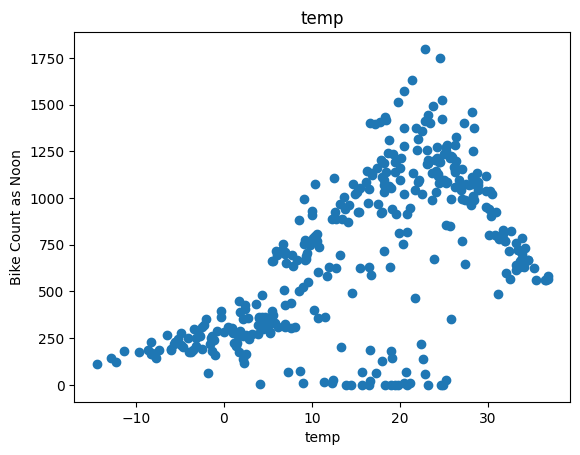

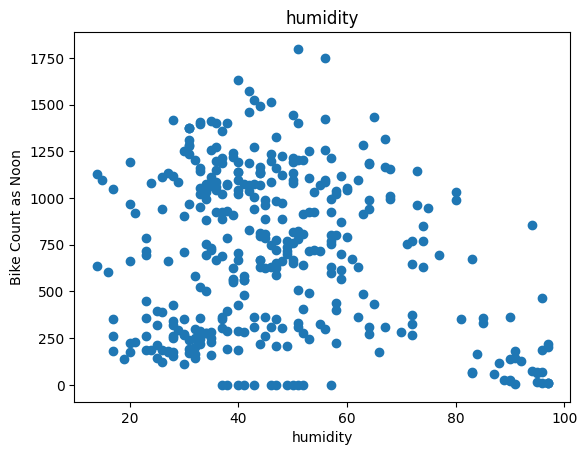

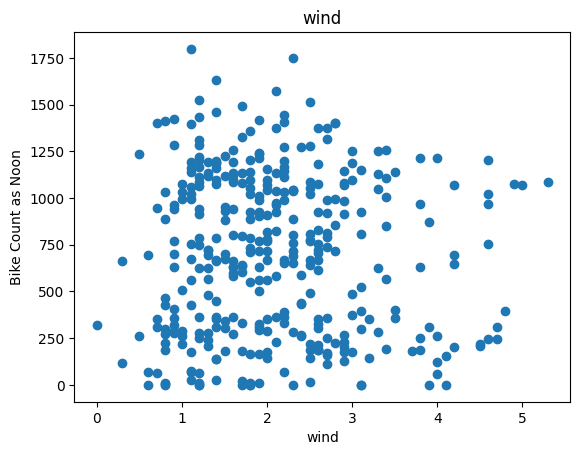

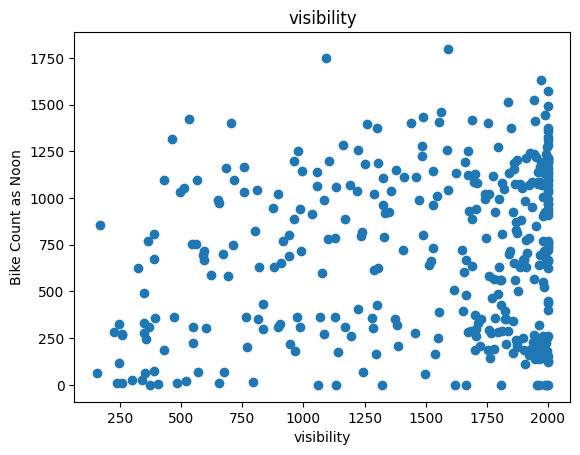

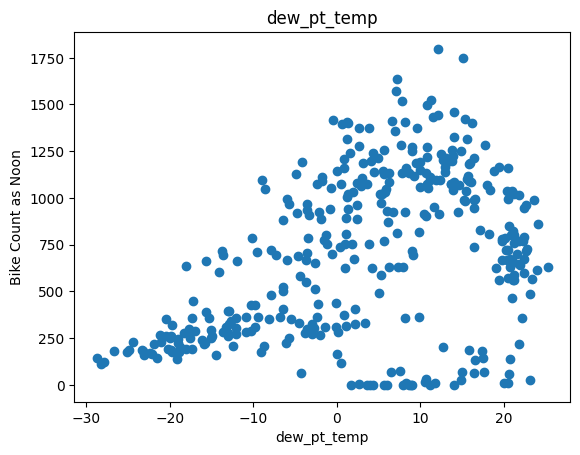

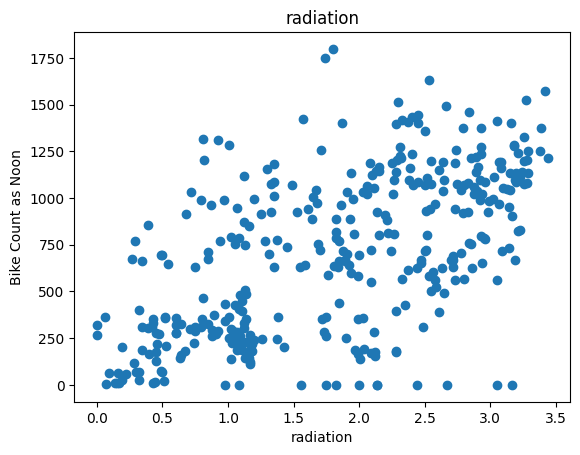

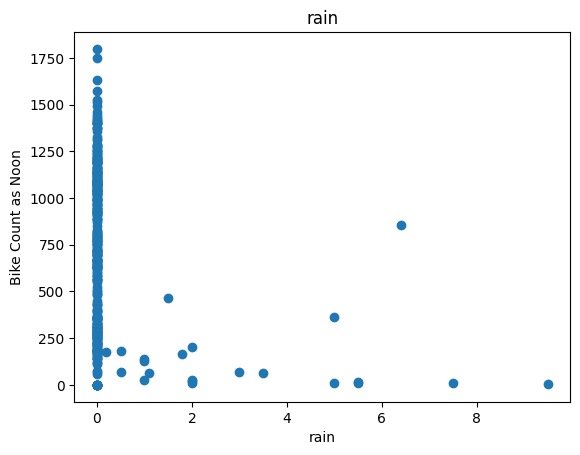

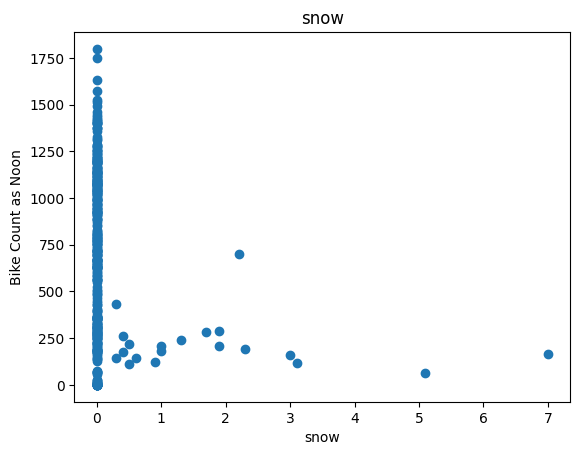

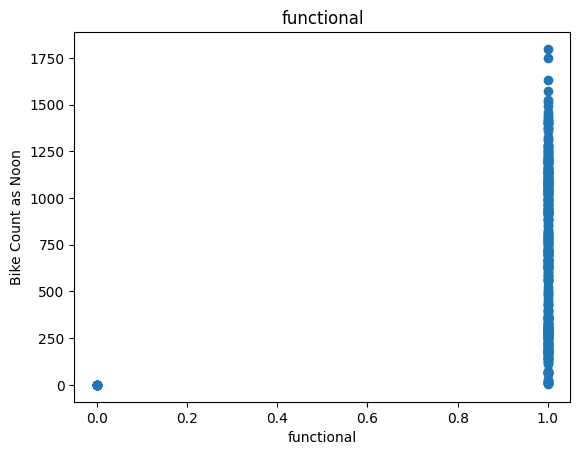

In [7]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("Bike Count as Noon")
  plt.xlabel(label)
  plt.show()

In [8]:
df = df.drop(["wind", "visibility", "functional"], axis = 1 )

In [9]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/Valid/Test dataset

In [10]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [11]:
def get_xy(data_frame, y_label, x_labels= None):
  data_frame = copy.deepcopy(data_frame)
  if x_labels is None:
    X = data_frame[[c for c in data_frame.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = data_frame[x_labels[0]].values.reshape(-1,1)
    else:
      X = data_frame[x_labels].values
  y = data_frame[y_label].values.reshape(-1,1)
  data = np.hstack((X,y))
  return data, X, y

In [12]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [13]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [14]:
temp_reg.score(X_test_temp, y_test_temp)

0.30316454067562404

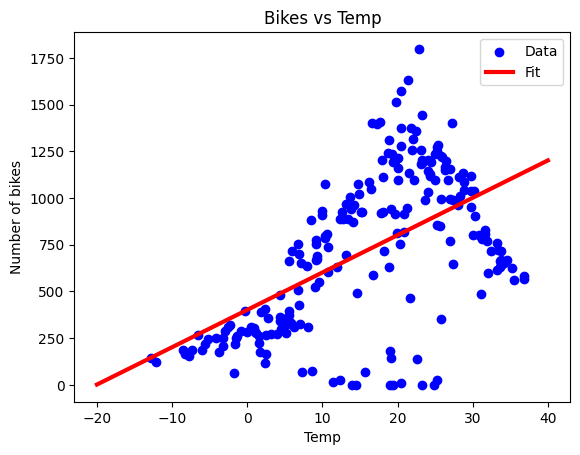

In [15]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple Linear Regression

In [16]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [17]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [18]:
all_reg.score(X_test_all, y_test_all)

0.5575743512392999

In [19]:
y_pred_lr = all_reg.predict(X_test_all)

# Regression with Neural Net

In [20]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [22]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [23]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [24]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,verbose = 0, epochs = 1000, validation_data = (X_val_temp, y_val_temp)
)

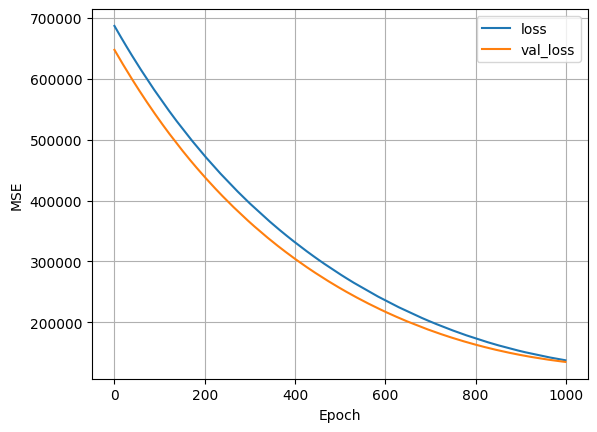

In [25]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


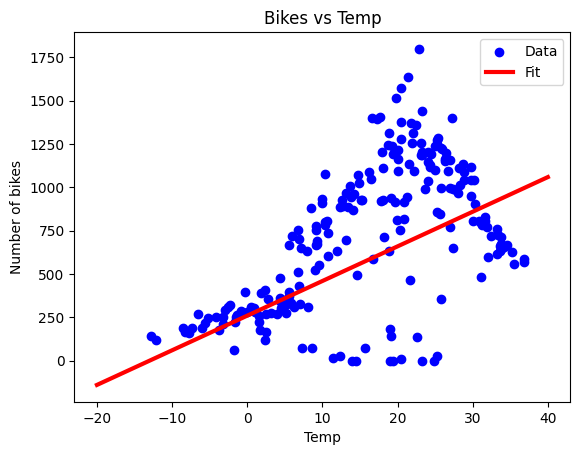

In [26]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# NEURAL NETWORKS

In [27]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [28]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32,activation ="relu"),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = "mean_squared_error")

In [29]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_val_all, y_val_all),
    verbose = 0,
    epochs = 110
)

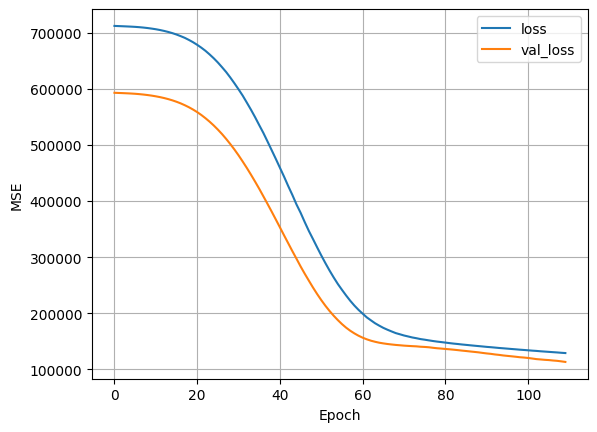

In [30]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


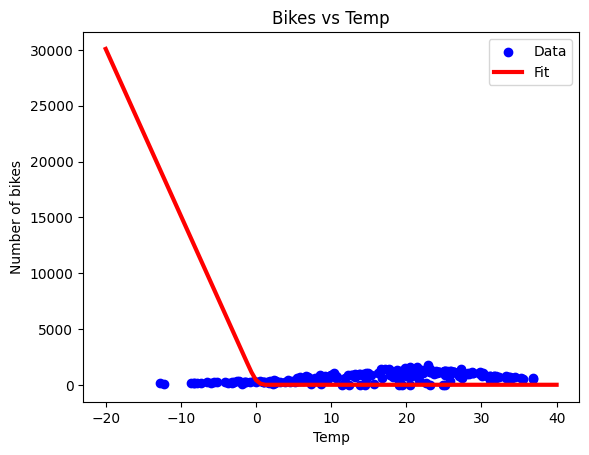

In [31]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [32]:
#We calculate the mse for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 4ms/step


In [33]:
def MSE (y_pred, y_real):
  return (np.square(y_pred-y_real)).mean()

In [34]:
MSE(y_pred_lr, y_test_all)

89616.84244041923

In [35]:
MSE(y_pred_nn, y_test_all)

120941.39891855755

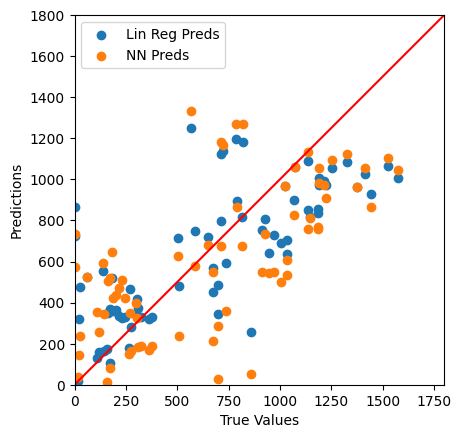

In [36]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")